In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
nbafull = pd.read_csv('Cleaned NBA Stats Balanced.csv') #full dataset in datatable
nba22= pd.read_csv('NBA22.csv')
#nbafull = nbafull.astype({"Season": str})
cond = nbafull['Season']==2022
nbafull = nbafull.drop(nbafull[cond].index)
nbafull = nbafull.drop(['W' , 'L' , 'Season', 'MIN', '+/-', 'Team', 'GP'], axis = 1) #datatable with only averages and percentages.


In [ ]:
print('Columns in datatable:')
print()
print(nbafull.columns)
print(nbafull.info)
print(nba22.columns)
print(nba22.info)

Columns in datatable:

Index(['Champion?', 'WIN %', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REDB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'Salary'],
      dtype='object')
<bound method DataFrame.info of      Champion?  WIN %    PTS   FGM   FGA  ...  BLK  BLKA    PF   PFD     Salary
1          0.0  0.569  113.7  40.8  87.2  ...  4.8   5.0  19.3  19.8  118804016
2          0.0  0.299  111.8  40.6  90.6  ...  5.1   6.4  23.1  21.0   85600106
3          0.0  0.354  113.3  41.4  91.8  ...  5.1   5.5  23.6  22.2   79180081
4          0.0  0.354  113.3  41.4  91.8  ...  5.1   5.5  23.6  22.2   99992696
5          0.0  0.524  103.2  38.1  84.4  ...  4.8   5.2  18.2  21.6   96315163
..         ...    ...    ...   ...   ...  ...  ...   ...   ...   ...        ...
767        0.0  0.232   93.2  34.5  78.7  ...  4.7   6.2  23.3   0.1   59085969
768        0.0  0.354   96.6  36.7  81.5  ...  4.7   6.1  26.2   2.7   53194441
769   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X=nbafull[['PTS', 'FGA',	'3P%',	'FTM',	'FT%',	'OREB',	'DREB',	'AST',	'TOV',	'STL',	'BLKA',	'PF',	'Salary']]  # Features
y=nbafull['Champion?']  # Labels

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
y_train.isnull().any()

False

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9506726457399103


In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred)

array([[211,   0],
       [ 11,   1]])

In [ ]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       211
         1.0       1.00      0.08      0.15        12

    accuracy                           0.95       223
   macro avg       0.98      0.54      0.56       223
weighted avg       0.95      0.95      0.93       223



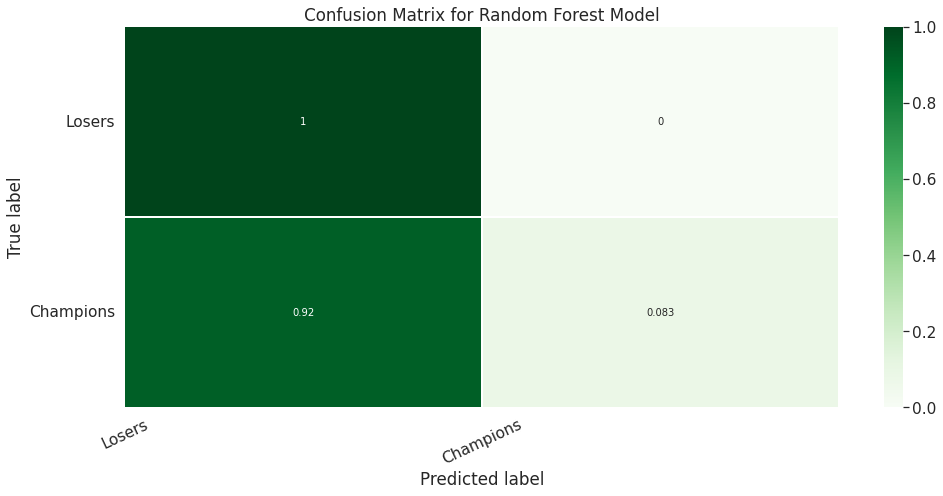

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Losers', 'Champions']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


In [ ]:
ID_2022 = pd.DataFrame(nba22['TEAM'])
X_2022 = nba22[["PTS", "FGA", "3P%", "FTM", "FT%", "OREB", "DREB", "AST", "TOV", "STL", "BLKA", "PF", "Salary"]]

In [ ]:
prediction = clf.predict_proba(X_2022)
pred_2022_df = pd.DataFrame(prediction, columns = ['Prob of 0', 'Prob of 1'])
ID_2022 = ID_2022.reset_index(drop = True)
RF_pred_2022 = ID_2022.join(pred_2022_df)
RF_pred_2022.sort_values(by=['Prob of 1'], ascending = False)

,TEAM,Prob of 0,Prob of 1
1,Golden State Warriors,0.41,0.59
14,Los Angeles Lakers,0.60,0.40
21,Toronto Raptors,0.66,0.34
6,Milwaukee Bucks,0.67,0.33
9,Atlanta Hawks,0.70,0.30
10,Boston Celtics,0.70,0.30
20,Denver Nuggets,0.73,0.27
18,Philadelphia 76ers,0.73,0.27
0,Phoenix Suns,0.78,0.22
2,Brooklyn Nets,0.79,0.21


In [1]:
RF_pred_2022.to_csv('RF_pred_2022.csv', index=True)
from google.colab import files
files.download('RF_pred_2022.csv')

NameError: ignored